# Ontology building on Stanford OpenIE

In [1]:
import json
with open('stanfordopenie.json', 'r') as openfile:
  read_json = json.load(openfile)
triplets = read_json["results"]
for triple in triplets:
  assert len(triple) == 3
triplets

[['Dániel Kondor, Márton Pósfai, István Csabai, Gábor Vattay',
  'author(s)',
  'Do the rich get richer? An empirical analysis of the BitCoin transaction network'],
 ['limit', 'is by', 'scarcity of available datum'],
 ['possibility', 'analyze', 'everyday monetary transaction'],
 ['real world datum', 'be compare to', 'present'],
 ['macroscopic property', 'be compare to', 'real world datum'],
 ['random network of interact agent', 'be usually employ on', 'present'],
 ['present econophysic model',
  'be usually employ on',
  'random network of interact agent'],
 ['Dániel Kondor', 'analyze Bitcoin in', 'paper'],
 ['complete list', 'be', 'where publicly available'],
 ['currency system', 'is', 'digital'],
 ['Dániel Kondor', 'reconstruct', 'network of transaction'],
 ['list', 'is', 'complete'],
 ['Dániel Kondor',
  'analyze structure by',
  'measure network characteristic over time'],
 ['measure network characteristic', 'is such', 'degree distribution'],
 ['linear preferential attachment',
  '

In [2]:
len(triplets)

11285

In [3]:
! pip install finbert-embedding

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Relation Ontology

In [4]:
import numpy as np
import pandas as pd

relations = np.array(triplets)[:, 1]

In [5]:
relations.shape

(11285,)

In [6]:
unique_rel, count = np.unique(relations, return_counts = True)
rel_dict = dict(zip(unique_rel, count))
rel_dict = dict(sorted(rel_dict.items(), key = lambda x: x[1], reverse = True))
rel_dict

{'is': 2012,
 'is in': 606,
 'be': 519,
 'is of': 424,
 'is for': 356,
 'is on': 343,
 'is to': 300,
 'is with': 288,
 'author(s)': 208,
 'has': 192,
 'is from': 167,
 'have': 161,
 'is between': 147,
 'is by': 126,
 'is such': 97,
 'is as': 95,
 'is at': 68,
 'of': 49,
 'use': 49,
 'provide': 46,
 'find': 44,
 'is over': 42,
 'show': 39,
 'present': 38,
 'is than': 37,
 'is into': 33,
 'become': 32,
 'propose': 32,
 'investigate': 31,
 'is through': 25,
 'is among': 24,
 'is during': 22,
 'make': 22,
 'is against': 21,
 "is 's": 20,
 'is across': 20,
 'apply': 19,
 'include': 19,
 'is like': 19,
 'is about': 18,
 'consider': 17,
 'demonstrate': 17,
 'exhibit': 17,
 'identify': 16,
 'is due': 16,
 'analyse': 15,
 'be in': 15,
 'compare to': 15,
 'follow': 15,
 'introduce': 15,
 'offer': 15,
 'represent': 15,
 'study': 15,
 'create': 14,
 'give': 14,
 'is after': 14,
 'is per': 14,
 'is under': 14,
 'analyze': 13,
 'predict': 13,
 'perform': 12,
 'realize': 12,
 'achieve': 11,
 'contain

In [7]:
len(rel_dict)

2705

#### Generating Embeddings for each relation

In [8]:
from finbert_embedding.embedding import FinbertEmbedding

finbert = FinbertEmbedding()

token_emb = {}
# rel_combined = list(set(" ".join(rel_dict.keys()).split(" ")))
for i in rel_dict.keys():
  word_embedding = finbert.word_vector(i)
  token_emb[i] = word_embedding

In [9]:
assert rel_dict.keys() == token_emb.keys()

In [10]:
final_embedding = {}

for key in token_emb.keys():
  numpy_tensor = []
  for i in token_emb[key]:
    numpy_tensor.append(i.numpy())
  numpy_tensor = np.array(numpy_tensor)
  final_embedding[key] = np.mean(numpy_tensor, axis = 0)

In [11]:
assert rel_dict.keys() == final_embedding.keys()
assert token_emb.keys() == final_embedding.keys()

for i in final_embedding:
  assert final_embedding[i].shape[0] == 768

#### Converting Relation Embedding Dict into panadas DataFrame

In [12]:
data = pd.DataFrame(final_embedding.values(), index = final_embedding.keys())
data

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
is,-2.863713,-0.232771,-0.777102,-0.413350,1.984296,3.094166,-0.750068,0.161551,1.484904,-5.021338,...,-0.204414,-2.729815,-1.419231,-1.044560,-1.829473,-2.347007,4.022555,0.374099,0.343072,0.336154
is in,-1.290344,-2.374374,0.710759,-2.091382,2.559954,2.126047,-0.462411,-0.427899,0.528780,-2.701677,...,-1.178940,-1.742929,-0.247869,-0.958666,-2.597205,-1.284091,2.472987,-0.301398,0.797585,1.064952
be,1.331915,-0.446903,-0.444302,-1.006841,1.380263,2.111643,0.062852,0.278242,3.972542,-6.316217,...,0.826859,-1.567798,-2.469906,-1.422467,-2.023844,-2.425972,3.619842,-0.685051,-1.124934,0.128575
is of,-2.534064,-1.127240,0.724256,-2.896423,3.201965,-0.147244,0.064452,-1.314243,-0.488179,-2.457188,...,-1.678758,-2.469892,-1.032201,-1.064551,-3.077995,-1.784761,2.489115,-0.207236,0.895658,0.838969
is for,-0.639549,-1.793476,0.870523,-2.653036,3.615763,1.679898,0.084465,-0.818330,0.532856,-2.453318,...,-1.382514,-2.149526,-1.882350,-0.955592,-3.430961,-0.565566,3.299810,-0.617072,-0.124953,0.476361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
would provide,-0.393501,-1.317480,-0.411442,-1.206155,2.708642,2.303343,-0.777563,-0.056121,2.153249,-3.414191,...,-0.616989,0.298264,-0.629910,-0.885617,-2.535391,-3.323925,2.629255,-0.715894,2.006780,-0.851186
would recommend datum,-0.662136,1.343097,1.251007,-1.574713,3.227307,0.427842,0.863229,2.387486,1.965043,-3.689824,...,1.505175,-0.219548,-0.468476,-2.808539,-1.820380,-2.193038,-0.232860,-0.807699,0.743276,5.449749
would take advantage of,-1.541805,-2.308632,0.399888,0.456259,1.761971,0.489570,-3.709814,2.555432,1.712280,-3.464057,...,-0.491211,0.072127,0.227224,-0.228690,-1.508223,-0.988771,0.884538,-1.998562,0.751798,-0.378665
write by,3.027869,0.308484,1.237113,-1.679274,3.488400,1.219483,1.541393,0.757310,1.431940,-2.653954,...,1.222321,1.657422,-1.609528,-1.573035,-1.674407,0.382996,-0.308651,-1.892907,-2.749975,-1.277673


#### Hierarchial Clustering

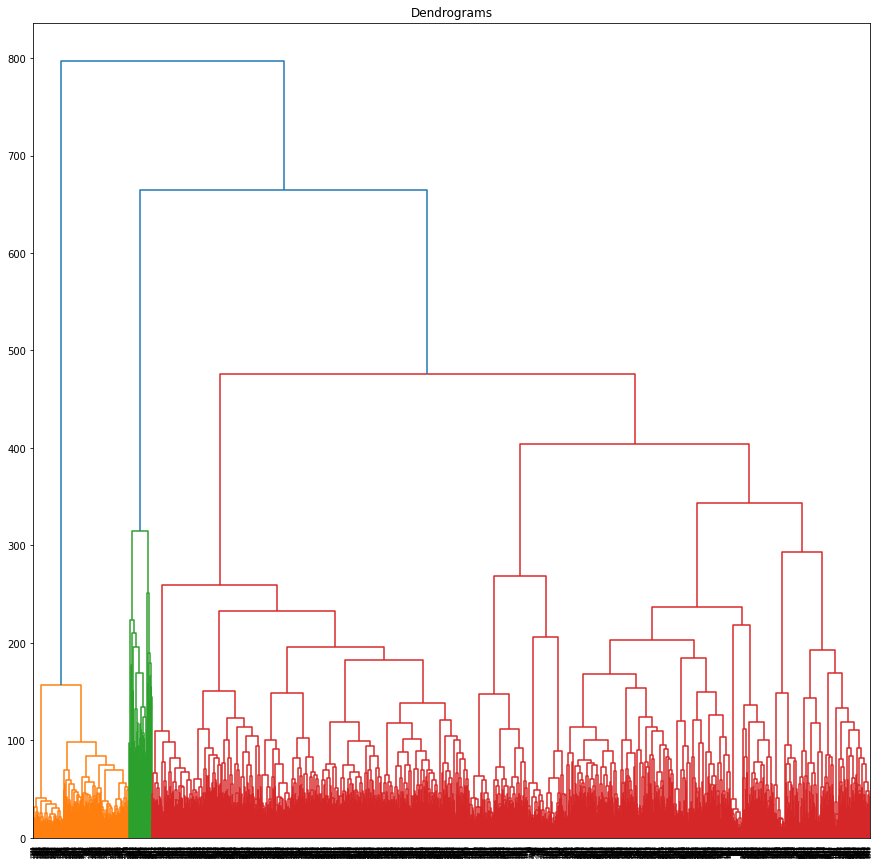

In [13]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(15, 15))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [14]:
from sklearn.cluster import AgglomerativeClustering

n_cluster = 50
clustering = AgglomerativeClustering(linkage = "ward", n_clusters = n_cluster)
clustering.fit(data)
clusters = clustering.labels_

In [15]:
clusters

array([20, 33, 20, ..., 21,  5, 11])

In [16]:
cluster_dict = {}
for i in range(n_cluster):
  cluster_dict[i] = data.index[np.where(clusters == i)]
cluster_dict

{0: Index(['categorize', 'calibrate'], dtype='object'),
 1: Index(['be cryptocurrencie', 'cryptocurrencie', 'other cryptocurrencie'], dtype='object'),
 2: Index(['quantify', 'infer', 'broaden', 'entail', 'iterate', 'rebalance',
        'surpass', 'unearth', 'validate', 'compile', 'envision', 'lag',
        'minimise', 'regularize', 'underline', 'underpin', 'upto'],
       dtype='object'),
 3: Index(['contribute to', 'depend on', 'relate to', 'further investigate',
        'suffer from', 'available be provide in', 'be available on',
        'be further develop', 'can also assess', 'further be build upon',
        'further improve due', 'future research', 'pursue also for',
        'strongly depend on', 'suffer for', 'typically become in',
        'will depend on', 'additionally appear everyday',
        'additionally can explore', 'also briefly explore',
        'also contribute to', 'also control for', 'also depend upon',
        'also deploy for', 'also deploy in', 'also emphasize by'

In [17]:
common_financial_verbs = [
    'buy', 'sell', 'crypto', 'trade', 'price', 'transfer', 'perturb', 'yield'
]

In [18]:
max_cluster_rel_dict = {}
for key, value in cluster_dict.items():
  tok = " ".join(value)
  flag = 0
  for verb in common_financial_verbs:
    if verb in tok:
      max_cluster_rel_dict[key] = verb
      flag = 1
  if flag == 0:
    max = 0
    for val in value:
      if rel_dict[val] >= max:
        max = rel_dict[val]
        max_cluster_rel_dict[key] = val
max_cluster_rel_dict

{0: 'categorize',
 1: 'crypto',
 2: 'quantify',
 3: 'contribute to',
 4: 'precede',
 5: 'author(s)',
 6: 'well result than',
 7: 'perturb',
 8: 'price',
 9: 'be proportional to',
 10: 'may have',
 11: 'yield',
 12: 'price',
 13: 'trade',
 14: 'also observe',
 15: 'consist of',
 16: 'price',
 17: 'disentangle',
 18: 'revisit',
 19: 'have become',
 20: 'yield',
 21: 'yield',
 22: 'be characterize by',
 23: 'analyse',
 24: 'thus actually facilitate',
 25: 'treat Bitcoin',
 26: 'first explore',
 27: 'is over',
 28: 'outperform',
 29: 'anticipate',
 30: 'reminisce',
 31: 'propose',
 32: 'also motivate',
 33: 'is in',
 34: 'sell',
 35: 'prevail',
 36: 'differ from',
 37: 'price',
 38: 'have identify',
 39: 'be relate to',
 40: 'diagnose',
 41: 'may finetune',
 42: 'thereby advance',
 43: 'endorse',
 44: 'trade',
 45: 'see in',
 46: 'ascertain',
 47: 'debunk',
 48: 'underestimate',
 49: 'finally describe'}

In [19]:
## Assigning each relation to a class as determined by the above algo
relation_cluster_ontology = {}
for key, value in cluster_dict.items():
  for val in value:
    relation_cluster_ontology[val] = max_cluster_rel_dict[key].upper()
relation_cluster_ontology

{'categorize': 'CATEGORIZE',
 'calibrate': 'CATEGORIZE',
 'be cryptocurrencie': 'CRYPTO',
 'cryptocurrencie': 'CRYPTO',
 'other cryptocurrencie': 'CRYPTO',
 'quantify': 'QUANTIFY',
 'infer': 'QUANTIFY',
 'broaden': 'QUANTIFY',
 'entail': 'QUANTIFY',
 'iterate': 'QUANTIFY',
 'rebalance': 'QUANTIFY',
 'surpass': 'QUANTIFY',
 'unearth': 'QUANTIFY',
 'validate': 'QUANTIFY',
 'compile': 'QUANTIFY',
 'envision': 'QUANTIFY',
 'lag': 'QUANTIFY',
 'minimise': 'QUANTIFY',
 'regularize': 'QUANTIFY',
 'underline': 'QUANTIFY',
 'underpin': 'QUANTIFY',
 'upto': 'QUANTIFY',
 'contribute to': 'CONTRIBUTE TO',
 'depend on': 'CONTRIBUTE TO',
 'relate to': 'CONTRIBUTE TO',
 'further investigate': 'CONTRIBUTE TO',
 'suffer from': 'CONTRIBUTE TO',
 'available be provide in': 'CONTRIBUTE TO',
 'be available on': 'CONTRIBUTE TO',
 'be further develop': 'CONTRIBUTE TO',
 'can also assess': 'CONTRIBUTE TO',
 'further be build upon': 'CONTRIBUTE TO',
 'further improve due': 'CONTRIBUTE TO',
 'future research': 

In [20]:
assert relation_cluster_ontology.keys() == rel_dict.keys()

#### Final Type of Relations

In [21]:
relation_class = list(set([i.upper() for i  in list(max_cluster_rel_dict.values())]))
relation_class

['BE CHARACTERIZE BY',
 'IS IN',
 'REMINISCE',
 'THEREBY ADVANCE',
 'MAY HAVE',
 'THUS ACTUALLY FACILITATE',
 'SELL',
 'CONSIST OF',
 'DISENTANGLE',
 'AUTHOR(S)',
 'PROPOSE',
 'ENDORSE',
 'REVISIT',
 'PRICE',
 'MAY FINETUNE',
 'OUTPERFORM',
 'QUANTIFY',
 'HAVE IDENTIFY',
 'SEE IN',
 'PREVAIL',
 'BE PROPORTIONAL TO',
 'ALSO OBSERVE',
 'CRYPTO',
 'PERTURB',
 'IS OVER',
 'CONTRIBUTE TO',
 'TRADE',
 'DIFFER FROM',
 'DEBUNK',
 'ASCERTAIN',
 'HAVE BECOME',
 'PRECEDE',
 'FINALLY DESCRIBE',
 'UNDERESTIMATE',
 'TREAT BITCOIN',
 'YIELD',
 'WELL RESULT THAN',
 'ALSO MOTIVATE',
 'DIAGNOSE',
 'FIRST EXPLORE',
 'BE RELATE TO',
 'ANTICIPATE',
 'CATEGORIZE',
 'ANALYSE']

In [22]:
len(relation_class)

44

## Entity Ontology

In [23]:
import numpy as np
import pandas as pd

entities = np.append(np.array(triplets)[:, 0], np.array(triplets)[:, 2])

In [24]:
entities.shape

(22570,)

In [25]:
unique_entities, count = np.unique(entities, return_counts = True)
entities_dict = dict(zip(unique_entities, count))
entities_dict = dict(sorted(entities_dict.items(), key = lambda x: x[1], reverse = True))
entities_dict

{'future': 319,
 'present': 280,
 'model': 233,
 'Bitcoin': 154,
 'time': 120,
 'cryptocurrencie': 102,
 'paper': 88,
 'one': 83,
 'other': 82,
 'current': 78,
 'market': 78,
 'result': 76,
 'the future': 72,
 'cryptocurrency market': 70,
 'price': 67,
 'volatility': 67,
 'study': 63,
 'high': 61,
 'return': 61,
 'different': 56,
 'that': 56,
 'value': 55,
 'large': 53,
 'financial': 51,
 'analysis': 46,
 'property': 43,
 'asset': 42,
 'bitcoin': 42,
 'investor': 42,
 'cryptocurrency': 41,
 'now': 41,
 'recently': 41,
 'currency': 40,
 'feature': 40,
 'network': 40,
 'approach': 39,
 'base': 38,
 'correlation': 38,
 'datum': 38,
 'long': 38,
 'new': 38,
 'period': 37,
 'short': 37,
 '2014': 36,
 'small': 36,
 'user': 36,
 '2016': 35,
 'change': 35,
 'system': 35,
 'statistical': 34,
 'trader': 33,
 'social': 32,
 'Tetsuya Takaishi': 31,
 'dynamic': 30,
 'early': 30,
 'method': 30,
 '2013': 29,
 'jump': 29,
 '2017': 28,
 'agent': 28,
 'particular': 28,
 'use': 28,
 'Our': 27,
 'behavior

In [26]:
len(entities_dict)

9633

#### Generating Embeddings for each Entity

In [27]:
from finbert_embedding.embedding import FinbertEmbedding

finbert_en = FinbertEmbedding()

entity_token_emb = {}
# rel_combined = list(set(" ".join(rel_dict.keys()).split(" ")))
for i in entities_dict.keys():
  word_embedding = finbert_en.word_vector(i)
  entity_token_emb[i] = word_embedding

In [28]:
assert entities_dict.keys() == entity_token_emb.keys()

In [29]:
entity_final_embedding = {}

for key in entity_token_emb.keys():
  numpy_tensor = []
  for i in entity_token_emb[key]:
    numpy_tensor.append(i.numpy())
  numpy_tensor = np.array(numpy_tensor)
  entity_final_embedding[key] = np.mean(numpy_tensor, axis = 0)

In [30]:
assert entities_dict.keys() == entity_final_embedding.keys()
assert entity_token_emb.keys() == entity_final_embedding.keys()

for i in entity_final_embedding:
  assert entity_final_embedding[i].shape[0] == 768

#### Converting Entity Embedding Dict into panadas DataFrame

In [31]:
entity_data = pd.DataFrame(entity_final_embedding.values(), index = entity_final_embedding.keys())
entity_data

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
future,-1.032358,0.122009,-1.386569,-1.109125,4.102249,2.936886,-0.237045,1.586890,-1.453797,-5.202733,...,-1.563134,1.063009,0.529733,-1.086973,1.351635,-2.670698,1.635224,-2.458868,-1.763119,-4.338936
present,-3.335910,2.892087,-1.249220,-0.238075,1.683522,1.076676,0.455045,2.891020,1.474119,-4.746337,...,0.129052,-0.373270,-4.049481,-1.917212,-1.755011,-3.352115,2.775335,-0.691684,0.089528,-2.356278
model,-2.001286,0.960699,-0.313204,-0.108324,3.483050,3.646119,0.318405,-0.308711,-0.819537,-5.882162,...,0.945766,-0.747382,-2.536995,-2.862435,-1.378481,-3.378901,2.711117,0.142842,-0.635836,0.237675
Bitcoin,-2.393842,-4.525390,5.411202,1.751484,17.445236,6.125531,-9.414983,4.518653,-4.048374,-0.198474,...,-1.969275,1.146046,-4.443971,-11.030018,-1.689454,-1.913654,-2.198191,-4.324292,-2.787411,4.073734
time,-0.272841,1.362566,-0.828931,-0.810933,4.477133,2.981641,0.481599,0.719027,-0.272348,-6.296786,...,1.154083,-1.819470,-1.221797,-1.832840,-0.095861,-2.327689,3.754240,1.395251,0.911370,-0.961081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ρ q,-1.329936,0.427619,0.321832,-1.183649,3.990660,2.379362,2.713877,-0.333500,1.189761,-1.725128,...,-1.158269,-1.474676,-0.475149,-2.038955,-1.820866,-3.162975,1.435348,-1.468082,-0.823675,0.102927
σ i t function,-0.575011,0.430463,0.896206,-1.546610,1.279318,2.649756,-0.097335,-0.978282,2.263621,-2.929046,...,0.706859,0.632175,-0.616700,-2.253177,-1.875642,-3.279577,3.603870,-1.023938,0.553415,1.610385
τ 1,-2.908549,-1.705752,-0.107611,-0.632734,2.498687,0.069058,-1.232965,1.747284,2.785502,-4.486913,...,2.496796,-0.817413,-2.170834,-0.924107,-0.100290,-2.528529,2.236952,1.360166,2.270260,1.817366
τ verify in empirical analysis,-0.081319,1.416350,0.064217,0.293462,2.090256,1.012677,0.238547,0.084407,0.494177,-0.773374,...,0.854109,0.049290,-0.537494,-2.217402,-3.187941,-1.648476,0.552586,-1.377914,1.865067,0.335717


#### Hierarchial Clustering

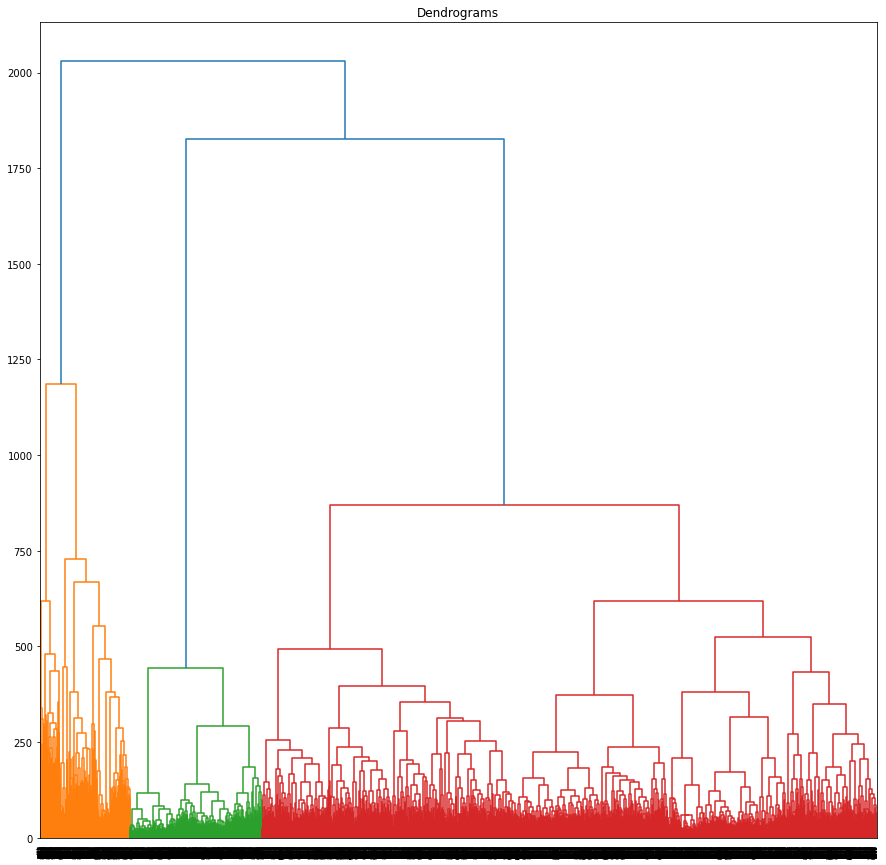

In [32]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(15, 15))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(entity_data, method='ward'))

In [33]:
from sklearn.cluster import AgglomerativeClustering

n_cluster = 25
clustering = AgglomerativeClustering(linkage = "ward", n_clusters = n_cluster)
clustering.fit(entity_data)
clusters = clustering.labels_

In [34]:
clusters

array([ 8,  8,  8, ...,  4, 22,  8])

In [35]:
entity_cluster_dict = {}
for i in range(n_cluster):
  entity_cluster_dict[i] = entity_data.index[np.where(clusters == i)]
entity_cluster_dict

{0: Index(['heterogeneous', 'econometric', 'asymmetric', 'logarithmic',
        'asymmetry', 'asynchronous', 'bibliometric', 'heterogeneity',
        'heteroscedasticity', 'heteroskedasticity', 'phenomenological',
        'asymmetrical', 'dynamism', 'econophysic', 'geopolitical',
        'heterogenous', 'histogram', 'idiosyncratic', 'macroeconomy'],
       dtype='object'),
 1: Index(['the future', 'Term memory', 'real time', 'time series', 'the year',
        'the week', 'December 2017', 'January 2017', 'January 2019',
        'select lag order',
        ...
        'web of Science Core Collection', 'weekly time window in period',
        'when already available at asset size 's quote price',
        'when base on short term window of 5/10 day',
        'where 3.51 % for concurrent high volatile market', 'whole period',
        'whole time span', 'word of mouth', 'year 2012', 'year quarter'],
       dtype='object', length=834),
 2: Index(['autoregressive', 'antipersistent', 'probabilis

#### Applying NER on these Clusters to find appropriate class

In [36]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [37]:
entity_cluster_NER = {}
for key, value in entity_cluster_dict.items():
  temp = []
  for val in value:
    doc = nlp(str(val))
    for ent in doc.ents:
      temp.append(ent.label_)
  if len(temp) == 0:
    temp.append("MISCELLANEOUS")
  entity_cluster_NER[key] = temp
entity_cluster_NER

{0: ['ORG'],
 1: ['DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'CARDINAL',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'CARDINAL',
  'DATE',
  'DATE',
  'DATE',
  'ORG',
  'DATE',
  'DATE',
  'ORG',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'TIME',
  'DATE',
  'DATE',
  'CARDINAL',
  'CARDINAL',
  'DATE',
  'CARDINAL',
  'PERCENT',
  'CARDINAL',
  'DATE',
  'DATE',
  'PERCENT',
  'DATE',
  'DATE',
  'DATE',
  'CARDINAL',
  'CARDINAL',
  'TIME',
  'DATE',
  'DATE',
  'PERCENT',
  'PERCENT',
  'DATE',
  'DATE',
  'PERCENT',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'CARDINAL',
  'CARDINAL',
  'DATE',
  'DATE',
  'DATE',
  'PERCENT',
  'DATE',
  'DATE',
  'PERCENT',
  'DATE',
  'CARDINAL',
  'CARDINAL',
  'CARDINAL',
  'CARDINAL',

In [38]:
## Calculating frequency of type of entities in each cluster
entity_cluster_NER_count = {}
for key, value in entity_cluster_NER.items():
  unique, count = np.unique(value, return_counts = True)
  ner_count = dict(zip(unique, count))
  ner_count = dict(sorted(ner_count.items(), key = lambda x: x[1], reverse = True))
  entity_cluster_NER_count[key] = ner_count
entity_cluster_NER_count

{0: {'ORG': 1},
 1: {'DATE': 255,
  'CARDINAL': 110,
  'ORG': 49,
  'PERCENT': 43,
  'ORDINAL': 19,
  'GPE': 18,
  'TIME': 9,
  'NORP': 7,
  'PERSON': 7,
  'MONEY': 6,
  'PRODUCT': 5,
  'QUANTITY': 1},
 2: {'MISCELLANEOUS': 1},
 3: {'ORG': 13, 'PERSON': 1, 'PRODUCT': 1},
 4: {'CARDINAL': 46,
  'ORG': 46,
  'ORDINAL': 26,
  'DATE': 20,
  'PERSON': 17,
  'LAW': 4,
  'PRODUCT': 4,
  'GPE': 3,
  'FAC': 1,
  'WORK_OF_ART': 1},
 5: {'ORG': 27,
  'CARDINAL': 10,
  'PERSON': 8,
  'DATE': 5,
  'GPE': 2,
  'TIME': 2,
  'PRODUCT': 1},
 6: {'ORG': 163,
  'PERSON': 122,
  'NORP': 55,
  'CARDINAL': 49,
  'DATE': 44,
  'GPE': 19,
  'ORDINAL': 11,
  'WORK_OF_ART': 5,
  'LAW': 4,
  'PRODUCT': 4,
  'TIME': 4,
  'PERCENT': 3,
  'LOC': 1},
 7: {'CARDINAL': 1, 'ORG': 1, 'PERSON': 1},
 8: {'DATE': 39,
  'CARDINAL': 19,
  'ORG': 16,
  'GPE': 9,
  'NORP': 9,
  'PRODUCT': 4,
  'ORDINAL': 3,
  'PERSON': 3,
  'FAC': 1,
  'TIME': 1,
  'WORK_OF_ART': 1},
 9: {'PERSON': 41, 'ORG': 12, 'GPE': 1},
 10: {'ORG': 61,
  

In [39]:
## Dictionary for handling those entities which do not belong to any class
## Assigning the most frequent type as the type to the complete cluster
max_ner_dict = {}
for key, value in entity_cluster_NER_count.items():
  max_ner_dict[key] = list(value.keys())[0]
max_ner_dict

{0: 'ORG',
 1: 'DATE',
 2: 'MISCELLANEOUS',
 3: 'ORG',
 4: 'CARDINAL',
 5: 'ORG',
 6: 'ORG',
 7: 'CARDINAL',
 8: 'DATE',
 9: 'PERSON',
 10: 'ORG',
 11: 'ORG',
 12: 'ORG',
 13: 'PERSON',
 14: 'ORG',
 15: 'ORG',
 16: 'ORG',
 17: 'PERSON',
 18: 'ORG',
 19: 'DATE',
 20: 'PERSON',
 21: 'ORG',
 22: 'ORG',
 23: 'DATE',
 24: 'CARDINAL'}

In [40]:
entity_cluster_ontology = {}
for key, value in entity_cluster_dict.items():
  for val in value:
    doc = nlp(str(val))
    if len(doc.ents) == 0:
      entity_cluster_ontology[val] = max_ner_dict[key]
    else:
      temp = []
      for ent in doc.ents:
        temp.append(ent.label_)
      entity_cluster_ontology[val] = temp[0]
entity_cluster_ontology

{'heterogeneous': 'ORG',
 'econometric': 'ORG',
 'asymmetric': 'ORG',
 'logarithmic': 'ORG',
 'asymmetry': 'ORG',
 'asynchronous': 'ORG',
 'bibliometric': 'ORG',
 'heterogeneity': 'ORG',
 'heteroscedasticity': 'ORG',
 'heteroskedasticity': 'ORG',
 'phenomenological': 'ORG',
 'asymmetrical': 'ORG',
 'dynamism': 'ORG',
 'econophysic': 'ORG',
 'geopolitical': 'ORG',
 'heterogenous': 'ORG',
 'histogram': 'ORG',
 'idiosyncratic': 'ORG',
 'macroeconomy': 'ORG',
 'the future': 'DATE',
 'Term memory': 'DATE',
 'real time': 'DATE',
 'time series': 'DATE',
 'the year': 'DATE',
 'the week': 'DATE',
 'December 2017': 'DATE',
 'January 2017': 'DATE',
 'January 2019': 'DATE',
 'select lag order': 'DATE',
 'time scale': 'DATE',
 '2011 to early 2014': 'CARDINAL',
 '2016 to 2018': 'DATE',
 'long run': 'DATE',
 'other hand': 'DATE',
 'term memory': 'DATE',
 'the beginning of 2018': 'DATE',
 'the second quarter of 2017': 'DATE',
 'year 2017': 'DATE',
 'year 2020': 'DATE',
 '12 March 2020': 'DATE',
 'Apri

In [41]:
assert entity_cluster_ontology.keys() == entities_dict.keys()

#### Final types of enities

In [42]:
entity_class = list(set(list(entity_cluster_ontology.values())))
entity_class

['WORK_OF_ART',
 'FAC',
 'TIME',
 'CARDINAL',
 'ORDINAL',
 'NORP',
 'QUANTITY',
 'LOC',
 'PERCENT',
 'MISCELLANEOUS',
 'GPE',
 'PRODUCT',
 'LAW',
 'DATE',
 'MONEY',
 'ORG',
 'PERSON']

In [43]:
len(entity_class)

17